In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from dtaidistance import dtw, clustering
from sklearn.cluster import KMeans
import plotly.express as px

In [4]:
df = pd.read_excel('../data/MERGED_DATA_INTERPOLATED2.xlsx')
df.head()

,LOC_CODE,DATUM,TIJD,ZS [mg/l],ZICHT [dm],T [oC],SiO2 [umol/L],SALNTT [DIMSLS],PO4 [umol/L],pH [DIMSLS],...,Pde,Plo,Dpu,Rte,Fja,Hak,Mhe,Dno,Dat,interpolated_columns
0,DANTZGT,1990-01-10,15:00:00,135.0,2.0,4.0,20.178571,29.19,1.645161,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,DANTZGT,1990-02-06,13:40:00,295.0,0.5,6.0,19.803571,27.37,1.177419,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['SiO2 [umol/L]', 'PO4 [umol/L]', 'pH [DIMSLS]..."
2,DANTZGT,1990-03-08,13:45:00,103.0,3.0,7.3,19.428571,24.99,0.709677,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,DANTZGT,1990-04-04,10:00:00,113.0,3.0,8.2,6.285714,28.79,0.806452,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,DANTZGT,1990-05-09,15:30:00,20.0,11.0,17.4,1.714286,33.28,1.161290,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [5]:
df.columns

Index(['LOC_CODE', 'DATUM', 'TIJD', 'ZS [mg/l]', 'ZICHT [dm]', 'T [oC]',
       'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]',
       ...
       'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat',
       'interpolated_columns'],
      dtype='object', length=106)

In [6]:
rename_dict = {'Acn': 'Actinocyclus normanii', 'Aco': 'Actinocyclus octonarius', 'Agl': 'Asterionella glacialis', 'Ata': 'Alexandrium tamarense', 'Cau': 'Corymbellus aureus', 'Ccu': 'Chaetoceros curvisetus', 'Cda': 'Chaetoceros danicus', 'Cdeb': 'Chaetoceros debilis', 'Cden': 'Chaetoceros densus', 'Cdi': 'Chaetoceros didymus', 'Cei': 'Chaetoceros eibenii', 'Cfu': 'Ceratium fusus', 'Cgr': 'Coscinodiscus granii', 'Cha': 'Chattonella', 'Coc': 'Cochlodinium', 'Cra': 'Coscinodiscus radiatus', 'Csu': 'Chaetoceros subtilis', 'Cwa': 'Coscinodiscus wailesii', 'Dac': 'Dinophysis acuminata', 'Dat': 'Dinophysis acuta', 'Dbr': 'Ditylum brightwellii', 'Dip': 'Diploneis', 'Dle': 'Diplopsalis lenticula', 'Dno': 'Dinophysis norvegica', 'Dpu': 'Detonula pumila', 'Dro': 'Dinophysis rotundata', 'Dsp': 'Dictyocha speculum', 'Edu': 'Eunotogramma dubium', 'Etr': 'Ebria tripartita', 'Ezo': 'Eucampia zodiacus', 'Fja': 'Fibrocapsa japonica', 'Gde': 'Guinardia delicatula', 'Gfa': 'Gyrosigma fasciola', 'Gfl': 'Guinardia flaccida', 'Gsp': 'Gyrodinium spirale', 'Hak': 'Heterosigma akashiwo', 'Hta': 'Helicotheca tamesis', 'Kgl': 'Katodinium glaucum', 'Lan': 'Lauderia annulata', 'Lun': 'Lithodesmium undulatum', 'Mhe': 'Mediopyxis helysia', 'Mnu': 'Melosira nummuloides', 'Mpe': 'Mesoporos perforatus', 'Ndi': 'Navicula distans', 'Nsc': 'Noctiluca scintillans', 'Nsi': 'Nitzschia sigma', 'Oau': 'Odontella aurita', 'Omo': 'Odontella mobiliensis', 'Ore': 'Odontella regia', 'Orh': 'Odontella rhombus', 'Oro': 'Oblea rotunda', 'Osi': 'Odontella sinensis', 'Pac': 'Protoperidinium achromaticum', 'Pan': 'Pleurosigma angulatum', 'Pba': 'Prorocentrum balticum', 'Pbi': 'Protoperidinium bipes', 'Pbr': 'Protoperidinium brevipes', 'Pcl': 'Protoperidinium claudicans', 'Pco': 'Protoperidinium conicum', 'Pde': 'Protoperidinium depressum', 'Pha': 'Phaeocystis', 'Plo': 'Pyramimonas longicauda', 'Pmi': 'Prorocentrum micans', 'Pos': 'Podosira stelliger', 'Pse': 'Pseudopedinella', 'Pst': 'Protoperidinium steinii', 'Psu': 'Protoperidinium subinerme', 'Pte': 'Pterosperma', 'Ptr': 'Prorocentrum triestinum', 'Ram': 'Rhaphoneis amphiceros', 'Rse': 'Rhizosolenia setigera', 'Rst': 'Rhizosolenia styliformis', 'Rte': 'Roperia tesselata', 'Stu': 'Stephanopyxis turris', 'Tec': 'Thalassiosira eccentrica', 'Tle': 'Thalassiosira levanderi', 'Tni': 'Thalassionema nitzschioides', 'Tno': 'Thalassiosira nordenskioeldii', 'Tor': 'Torodinium robustum', 'Tro': 'Thalassiosira rotula'}

df.rename(columns=rename_dict, inplace=True)

In [7]:
phytoplankton_columns = df.columns[25:-2]
abiotic_factors = [
    'ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]',
    'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]',
    'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]'
]

display(phytoplankton_columns)

locations = list(df["LOC_CODE"].unique())
display(locations)

Index(['Asterionella glacialis', 'Ditylum brightwellii', 'Eucampia zodiacus',
       'Guinardia delicatula', 'Odontella aurita', 'Odontella mobiliensis',
       'Odontella rhombus', 'Odontella sinensis', 'Rhaphoneis amphiceros',
       'Rhizosolenia setigera', 'Thalassiosira eccentrica',
       'Thalassiosira levanderi', 'Thalassionema nitzschioides',
       'Thalassiosira rotula', 'Diplopsalis lenticula', 'Ebria tripartita',
       'Guinardia flaccida', 'Gyrodinium spirale', 'Noctiluca scintillans',
       'Protoperidinium bipes', 'Protoperidinium brevipes', 'Phaeocystis',
       'Stephanopyxis turris', 'Katodinium glaucum', 'Oblea rotunda',
       'Torodinium robustum', 'Chaetoceros didymus', 'Coscinodiscus radiatus',
       'Odontella regia', 'Alexandrium tamarense', 'Ceratium fusus',
       'Coscinodiscus granii', 'Lauderia annulata',
       'Protoperidinium claudicans', 'Prorocentrum micans',
       'Podosira stelliger', 'Pseudopedinella', 'Chaetoceros densus',
       'Actinocyclu

['DANTZGT',
 'DREISR',
 'GOERE6',
 'GROOTGND',
 'HANSWGL',
 'HUIBGOT',
 'LODSGT',
 'MARSDND',
 'NOORDWK10',
 'NOORDWK2',
 'NOORDWK20',
 'NOORDWK70',
 'ROTTMPT3',
 'ROTTMPT50',
 'ROTTMPT70',
 'SCHAARVODDL',
 'SOELKKPDOT',
 'TERSLG10',
 'TERSLG100',
 'TERSLG135',
 'TERSLG175',
 'TERSLG235',
 'TERSLG4',
 'VLISSGBISSVH',
 'WALCRN2',
 'WALCRN20',
 'WALCRN70']

In [8]:
phyto = df[['LOC_CODE', *phytoplankton_columns]]
display(phyto)


summed_phyto = phyto.groupby('LOC_CODE').sum()
totals = summed_phyto.sum(axis=1)

normalized_phyto = summed_phyto.div(totals, axis=0)
display(normalized_phyto)



,LOC_CODE,Asterionella glacialis,Ditylum brightwellii,Eucampia zodiacus,Guinardia delicatula,Odontella aurita,Odontella mobiliensis,Odontella rhombus,Odontella sinensis,Rhaphoneis amphiceros,...,Eunotogramma dubium,Mesoporos perforatus,Protoperidinium depressum,Pyramimonas longicauda,Detonula pumila,Roperia tesselata,Fibrocapsa japonica,Heterosigma akashiwo,Mediopyxis helysia,Dinophysis norvegica
0,DANTZGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DANTZGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DANTZGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DANTZGT,3.271842,4.748777,3.572755,3.572755,4.313065,3.748808,3.572755,3.873785,3.271842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DANTZGT,4.669596,NaN,3.271842,3.970672,NaN,2.670246,1.973128,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13500,WALCRN70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13501,WALCRN70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13502,WALCRN70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13503,WALCRN70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Asterionella glacialis,Ditylum brightwellii,Eucampia zodiacus,Guinardia delicatula,Odontella aurita,Odontella mobiliensis,Odontella rhombus,Odontella sinensis,Rhaphoneis amphiceros,Rhizosolenia setigera,...,Eunotogramma dubium,Mesoporos perforatus,Protoperidinium depressum,Pyramimonas longicauda,Detonula pumila,Roperia tesselata,Fibrocapsa japonica,Heterosigma akashiwo,Mediopyxis helysia,Dinophysis norvegica
LOC_CODE,,,,,,,,,,,,,,,,,,,,,
DANTZGT,0.038945,0.020279,0.013985,0.057868,0.066055,0.014795,0.051145,0.032418,0.008734,0.043334,...,0.059846,0.000000,0.000116,0.004624,0.001296,0.000907,0.005535,0.000801,0.026047,0.000000
DREISR,0.030594,0.052739,0.021581,0.047234,0.009874,0.001084,0.000201,0.002983,0.000585,0.046366,...,0.003363,0.001010,0.000327,0.007770,0.007069,0.000668,0.004412,0.003927,0.000000,0.000000
GOERE6,0.045853,0.033326,0.031402,0.078253,0.040526,0.002938,0.011415,0.027076,0.034108,0.041591,...,0.034426,0.001956,0.000850,0.007106,0.005340,0.001523,0.006778,0.003179,0.000401,0.000000
GROOTGND,0.017873,0.027118,0.003472,0.022958,0.085661,0.002184,0.001199,0.008985,0.013132,0.074121,...,0.095290,0.000000,0.000000,0.001488,0.000000,0.000000,0.000950,0.000000,0.014874,0.000000
HANSWGL,0.044173,0.040749,0.018189,0.062167,0.067070,0.013435,0.004114,0.031590,0.105046,0.039720,...,0.052577,0.000204,0.000363,0.008958,0.003737,0.001041,0.006780,0.000936,0.000789,0.000000
HUIBGOT,0.037944,0.018294,0.018971,0.057936,0.042268,0.004307,0.004066,0.030798,0.009632,0.054822,...,0.039361,0.002430,0.001312,0.008402,0.003495,0.001362,0.011128,0.002020,0.012580,0.000100
LODSGT,0.035764,0.040410,0.026303,0.096000,0.056649,0.001583,0.004532,0.024974,0.010229,0.059316,...,0.021884,0.001190,0.000000,0.004237,0.006881,0.000337,0.004709,0.003621,0.011927,0.000000
MARSDND,0.042341,0.024618,0.022392,0.063354,0.038353,0.004029,0.007900,0.032884,0.016742,0.038710,...,0.029757,0.000981,0.000393,0.009589,0.003437,0.001499,0.010769,0.003393,0.017546,0.000000
NOORDWK10,0.025963,0.025488,0.035564,0.083182,0.009327,0.001413,0.003965,0.017948,0.012733,0.031760,...,0.008052,0.003098,0.001980,0.008741,0.005684,0.002642,0.008058,0.003435,0.000000,0.000207


In [9]:
# gets binary vectors of measured/not measured
non_empty = phyto.dropna(subset=phyto.columns[1:], how='all').reset_index(drop=True)
non_empty


binary_species = non_empty.iloc[:, 1:].map(lambda x: 1 if x > 0 else 0)
binary_phyto = pd.concat([non_empty.iloc[:, 0], binary_species], axis=1)
display(binary_phyto)

summed_binary_phyto = binary_phyto.groupby('LOC_CODE').sum()
display(summed_binary_phyto)
totals = summed_binary_phyto.sum(axis=1)

normalized_binary_phyto = summed_binary_phyto.div(totals, axis=0)
display(normalized_binary_phyto)

,LOC_CODE,Asterionella glacialis,Ditylum brightwellii,Eucampia zodiacus,Guinardia delicatula,Odontella aurita,Odontella mobiliensis,Odontella rhombus,Odontella sinensis,Rhaphoneis amphiceros,...,Eunotogramma dubium,Mesoporos perforatus,Protoperidinium depressum,Pyramimonas longicauda,Detonula pumila,Roperia tesselata,Fibrocapsa japonica,Heterosigma akashiwo,Mediopyxis helysia,Dinophysis norvegica
0,DANTZGT,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,DANTZGT,1,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DANTZGT,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DANTZGT,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,DANTZGT,1,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,WALCRN70,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10320,WALCRN70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10321,WALCRN70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10322,WALCRN70,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Asterionella glacialis,Ditylum brightwellii,Eucampia zodiacus,Guinardia delicatula,Odontella aurita,Odontella mobiliensis,Odontella rhombus,Odontella sinensis,Rhaphoneis amphiceros,Rhizosolenia setigera,...,Eunotogramma dubium,Mesoporos perforatus,Protoperidinium depressum,Pyramimonas longicauda,Detonula pumila,Roperia tesselata,Fibrocapsa japonica,Heterosigma akashiwo,Mediopyxis helysia,Dinophysis norvegica
LOC_CODE,,,,,,,,,,,,,,,,,,,,,
DANTZGT,176,129,80,286,334,93,329,225,58,242,...,267,0,1,26,8,6,33,5,131,0
DREISR,79,181,60,136,39,5,1,13,3,151,...,10,3,2,21,20,3,13,9,0,0
GOERE6,101,100,78,173,108,12,47,90,97,121,...,81,7,4,19,14,6,19,8,1,0
GROOTGND,49,96,12,74,251,12,6,40,44,218,...,228,0,0,4,0,0,3,0,49,0
HANSWGL,161,204,77,245,280,71,25,157,407,178,...,189,1,2,40,15,5,32,5,4,0
HUIBGOT,188,127,108,297,238,33,36,228,71,318,...,185,17,13,49,19,11,66,12,74,1
LODSGT,111,169,88,269,195,8,23,105,46,228,...,68,5,0,15,23,2,18,13,44,0
MARSDND,198,166,127,310,218,34,74,242,114,231,...,146,7,4,52,20,13,65,19,98,0
NOORDWK10,166,231,236,477,82,13,53,178,120,267,...,58,26,23,62,38,30,60,23,0,3


,Asterionella glacialis,Ditylum brightwellii,Eucampia zodiacus,Guinardia delicatula,Odontella aurita,Odontella mobiliensis,Odontella rhombus,Odontella sinensis,Rhaphoneis amphiceros,Rhizosolenia setigera,...,Eunotogramma dubium,Mesoporos perforatus,Protoperidinium depressum,Pyramimonas longicauda,Detonula pumila,Roperia tesselata,Fibrocapsa japonica,Heterosigma akashiwo,Mediopyxis helysia,Dinophysis norvegica
LOC_CODE,,,,,,,,,,,,,,,,,,,,,
DANTZGT,0.031178,0.022852,0.014172,0.050664,0.059167,0.016475,0.058282,0.039858,0.010275,0.042870,...,0.047298,0.000000,0.000177,0.004606,0.001417,0.001063,0.005846,0.000886,0.023206,0.000000
DREISR,0.026734,0.061252,0.020305,0.046024,0.013198,0.001692,0.000338,0.004399,0.001015,0.051100,...,0.003384,0.001015,0.000677,0.007107,0.006768,0.001015,0.004399,0.003046,0.000000,0.000000
GOERE6,0.037658,0.037286,0.029083,0.064504,0.040268,0.004474,0.017524,0.033557,0.036167,0.045116,...,0.030201,0.002610,0.001491,0.007084,0.005220,0.002237,0.007084,0.002983,0.000373,0.000000
GROOTGND,0.016781,0.032877,0.004110,0.025342,0.085959,0.004110,0.002055,0.013699,0.015068,0.074658,...,0.078082,0.000000,0.000000,0.001370,0.000000,0.000000,0.001027,0.000000,0.016781,0.000000
HANSWGL,0.038026,0.048181,0.018186,0.057865,0.066131,0.016769,0.005905,0.037081,0.096127,0.042041,...,0.044639,0.000236,0.000472,0.009447,0.003543,0.001181,0.007558,0.001181,0.000945,0.000000
HUIBGOT,0.030639,0.020698,0.017601,0.048403,0.038787,0.005378,0.005867,0.037158,0.011571,0.051825,...,0.030150,0.002771,0.002119,0.007986,0.003096,0.001793,0.010756,0.001956,0.012060,0.000163
LODSGT,0.032016,0.048745,0.025382,0.077589,0.056245,0.002307,0.006634,0.030286,0.013268,0.065763,...,0.019613,0.001442,0.000000,0.004327,0.006634,0.000577,0.005192,0.003750,0.012691,0.000000
MARSDND,0.032869,0.027556,0.021082,0.051461,0.036189,0.005644,0.012284,0.040173,0.018924,0.038347,...,0.024236,0.001162,0.000664,0.008632,0.003320,0.002158,0.010790,0.003154,0.016268,0.000000
NOORDWK10,0.022051,0.030685,0.031350,0.063363,0.010893,0.001727,0.007040,0.023645,0.015940,0.035468,...,0.007705,0.003454,0.003055,0.008236,0.005048,0.003985,0.007970,0.003055,0.000000,0.000399


In [10]:
def display_all(df):
    pd.set_option('display.max_rows', None)
    display(df)
    pd.reset_option('display.max_rows')

pd.set_option('display.max_columns', None)

In [11]:
# Initialize an empty list to hold the feature vectors
feature_vecs = []

# Loop through each phytoplankton type and calculate the mean values of abiotic factors
for location in normalized_phyto.index:
    row = normalized_phyto.loc[location]

    feature_vecs.append(row.tolist())

# Convert the feature vectors to a NumPy array
feature_vecs = np.array(feature_vecs)
display(feature_vecs)

array([[0.03894529, 0.02027876, 0.01398545, ..., 0.0008008 , 0.02604742,
        0.        ],
       [0.03059426, 0.05273884, 0.02158093, ..., 0.00392683, 0.        ,
        0.        ],
       [0.04585267, 0.03332571, 0.03140175, ..., 0.00317911, 0.0004011 ,
        0.        ],
       ...,
       [0.05012417, 0.03644556, 0.03174729, ..., 0.00228567, 0.00021572,
        0.        ],
       [0.03130483, 0.0313299 , 0.02856368, ..., 0.00281523, 0.00024678,
        0.        ],
       [0.03271185, 0.02787209, 0.01741187, ..., 0.00047044, 0.00030081,
        0.        ]])

In [12]:
normalized_phyto.index

Index(['DANTZGT', 'DREISR', 'GOERE6', 'GROOTGND', 'HANSWGL', 'HUIBGOT',
       'LODSGT', 'MARSDND', 'NOORDWK10', 'NOORDWK2', 'NOORDWK20', 'NOORDWK70',
       'ROTTMPT3', 'ROTTMPT50', 'ROTTMPT70', 'SCHAARVODDL', 'SOELKKPDOT',
       'TERSLG10', 'TERSLG100', 'TERSLG135', 'TERSLG175', 'TERSLG235',
       'TERSLG4', 'VLISSGBISSVH', 'WALCRN2', 'WALCRN20', 'WALCRN70'],
      dtype='object', name='LOC_CODE')

In [13]:
def plot_inertia(nr_clusters_limit):
    inertia_list = []

    for nr_clusters in range(1, nr_clusters_limit):
        kmeans = KMeans(n_clusters=nr_clusters, random_state=0)
        kmeans.fit(feature_vecs)
        inertia_list.append(kmeans.inertia_)

    fig = plt.figure(figsize=(6, 5))
    plt.plot(range(1, nr_clusters_limit), inertia_list, marker='o')
    plt.xlabel('Nr Clusters')
    plt.ylabel('Kmean Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()


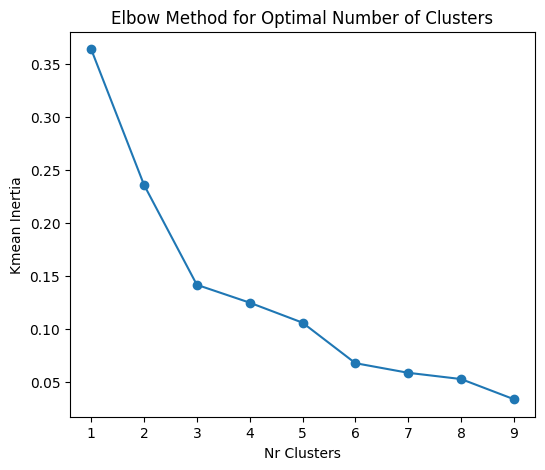

[2 5 2 4 3 2 2 2 1 1 1 0 2 0 0 4 5 1 0 0 0 0 1 2 2 1 1]
Cluster 0:
['NOORDWK70', 'ROTTMPT50', 'ROTTMPT70', 'TERSLG100', 'TERSLG135', 'TERSLG175', 'TERSLG235']
7

Cluster 1:
['NOORDWK10', 'NOORDWK2', 'NOORDWK20', 'TERSLG10', 'TERSLG4', 'WALCRN20', 'WALCRN70']
7

Cluster 2:
['DANTZGT', 'GOERE6', 'HUIBGOT', 'LODSGT', 'MARSDND', 'ROTTMPT3', 'VLISSGBISSVH', 'WALCRN2']
8

Cluster 3:
['HANSWGL']
1

Cluster 4:
['GROOTGND', 'SCHAARVODDL']
2

Cluster 5:
['DREISR', 'SOELKKPDOT']
2



,PCA Component 1,PCA Component 2,PCA Component 3,Cluster,Cluster Name,Location
0,-0.064087,-0.049962,-0.039873,2,Coastal,DANTZGT
1,-0.008701,-0.068820,0.110081,5,Lakes,DREISR
2,-0.022034,-0.041256,-0.027160,2,Coastal,GOERE6
3,-0.193343,0.084604,0.027299,4,Real Estuaries,GROOTGND
4,-0.128033,0.007415,-0.034754,3,Coastal/Estuary,HANSWGL
5,-0.030931,-0.034518,-0.019918,2,Coastal,HUIBGOT
6,-0.047644,-0.075042,0.003425,2,Coastal,LODSGT
7,-0.015915,-0.037132,-0.022371,2,Coastal,MARSDND
8,0.028875,-0.024411,-0.002578,1,Offshore,NOORDWK10
9,-0.003615,-0.036911,-0.009723,1,Offshore,NOORDWK2


    PCA Component 1  PCA Component 2  PCA Component 3 Cluster  \
0         -0.064087        -0.049962        -0.039873       2   
1         -0.008701        -0.068820         0.110081       5   
2         -0.022034        -0.041256        -0.027160       2   
3         -0.193343         0.084604         0.027299       4   
4         -0.128033         0.007415        -0.034754       3   
5         -0.030931        -0.034518        -0.019918       2   
6         -0.047644        -0.075042         0.003425       2   
7         -0.015915        -0.037132        -0.022371       2   
8          0.028875        -0.024411        -0.002578       1   
9         -0.003615        -0.036911        -0.009723       1   
10         0.041975        -0.011512        -0.004022       1   
11         0.093406         0.043515        -0.017149       0   
12        -0.028632        -0.040075        -0.027582       2   
13         0.088565         0.020381        -0.000847       0   
14         0.089158      

In [14]:
plot_inertia(10)

n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(feature_vecs)
labels = kmeans.labels_
print(labels)

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(feature_vecs)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# colors = ['r', 'g', 'b', 'y', 'c', 'm']
# for i in range(n_clusters):
#     ax.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], reduced_features[labels == i, 2], 
#                color=colors[i], label=f'Cluster {i}')

# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')
# ax.legend()
# plt.title('K-means Clustering')
# plt.show()

location_clusters = []

for i in range(n_clusters):
    location_cluster = [locations[j] for j in range(len(labels)) if labels[j] == i]
    location_clusters.append(location_cluster)
    print(f"Cluster {i}:")
    print(location_cluster)
    print(len(location_cluster))
    print()

color_dict = {"Open Sea": "#260f26", "Offshore": "#404e7c", "Coastal": "#357ded", "Coastal/Estuary": "#71b48d", "Real Estuaries": "#32e875", "Lakes": "#56eef4"}


cluster_name_map = {"0": "Open Sea", "1": "Offshore", "2": "Coastal", "3": "Coastal/Estuary", "4": "Real Estuaries", "5": "Lakes"}



df = pd.DataFrame(reduced_features, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df['Cluster'] = labels.astype(str)
df['Cluster Name'] = df['Cluster'].map(cluster_name_map)

df['Location'] = normalized_phyto.index
display(df)
print(df)
fig = px.scatter_3d(df, x='PCA Component 1', y='PCA Component 2', z='PCA Component 3', color='Cluster Name', color_discrete_map = color_dict, hover_name='Location')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()


Cluster 0: Open Sea
Cluster 1: Offshore
Cluster 2: Coastal
Cluster 3: Coastal/Estuary
Cluster 4: Real Estuaries
Cluster 5: Lakes


In [2]:
plot_inertia(10)

n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(feature_vecs)
labels = kmeans.labels_
print(labels)

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(feature_vecs)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# colors = ['r', 'g', 'b', 'y', 'c', 'm']
# for i in range(n_clusters):
#     ax.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], reduced_features[labels == i, 2], 
#                color=colors[i], label=f'Cluster {i}')

# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')
# ax.legend()
# plt.title('K-means Clustering')
# plt.show()

location_clusters = []

for i in range(n_clusters):
    location_cluster = [locations[j] for j in range(len(labels)) if labels[j] == i]
    location_clusters.append(location_cluster)
    print(f"Cluster {i}:")
    print(location_cluster)
    print(len(location_cluster))
    print()


df = pd.DataFrame(reduced_features, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df['Cluster'] = labels.astype(str)

df['Location'] = normalized_phyto.index
fig = px.scatter_3d(df, x='PCA Component 1', y='PCA Component 2', z='PCA Component 3', color='Cluster', hover_name='Location')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()


NameError: name 'plot_inertia' is not defined

In [15]:
display(location_clusters)

[['NOORDWK70',
  'ROTTMPT50',
  'ROTTMPT70',
  'TERSLG100',
  'TERSLG135',
  'TERSLG175',
  'TERSLG235'],
 ['NOORDWK10',
  'NOORDWK2',
  'NOORDWK20',
  'TERSLG10',
  'TERSLG4',
  'WALCRN20',
  'WALCRN70'],
 ['DANTZGT',
  'GOERE6',
  'HUIBGOT',
  'LODSGT',
  'MARSDND',
  'ROTTMPT3',
  'VLISSGBISSVH',
  'WALCRN2'],
 ['HANSWGL'],
 ['GROOTGND', 'SCHAARVODDL'],
 ['DREISR', 'SOELKKPDOT']]

In [51]:
clustered_dfs = {}
for i, group in enumerate(location_clusters):
    mask = normalized_phyto.index.isin(group)
    clustered_dfs[i] = normalized_phyto[mask]

clustered_dfs[5]

,Asterionella glacialis,Ditylum brightwellii,Eucampia zodiacus,Guinardia delicatula,Odontella aurita,Odontella mobiliensis,Odontella rhombus,Odontella sinensis,Rhaphoneis amphiceros,Rhizosolenia setigera,Thalassiosira eccentrica,Thalassiosira levanderi,Thalassionema nitzschioides,Thalassiosira rotula,Diplopsalis lenticula,Ebria tripartita,Guinardia flaccida,Gyrodinium spirale,Noctiluca scintillans,Protoperidinium bipes,Protoperidinium brevipes,Phaeocystis,Stephanopyxis turris,Katodinium glaucum,Oblea rotunda,Torodinium robustum,Chaetoceros didymus,Coscinodiscus radiatus,Odontella regia,Alexandrium tamarense,Ceratium fusus,Coscinodiscus granii,Lauderia annulata,Protoperidinium claudicans,Prorocentrum micans,Podosira stelliger,Pseudopedinella,Chaetoceros densus,Actinocyclus octonarius,Diploneis,Chaetoceros subtilis,Melosira nummuloides,Protoperidinium conicum,Chaetoceros debilis,Coscinodiscus wailesii,Prorocentrum balticum,Dinophysis acuminata,Prorocentrum triestinum,Lithodesmium undulatum,Nitzschia sigma,Rhizosolenia styliformis,Protoperidinium steinii,Actinocyclus normanii,Thalassiosira nordenskioeldii,Chaetoceros curvisetus,Pleurosigma angulatum,Gyrosigma fasciola,Helicotheca tamesis,Dictyocha speculum,Protoperidinium subinerme,Chaetoceros eibenii,Navicula distans,Chaetoceros danicus,Dinophysis rotundata,Chattonella,Protoperidinium achromaticum,Corymbellus aureus,Cochlodinium,Pterosperma,Eunotogramma dubium,Mesoporos perforatus,Protoperidinium depressum,Pyramimonas longicauda,Detonula pumila,Roperia tesselata,Fibrocapsa japonica,Heterosigma akashiwo,Mediopyxis helysia,Dinophysis norvegica
LOC_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DREISR,0.030594,0.052739,0.021581,0.047234,0.009874,0.001084,0.000201,0.002983,0.000585,0.046366,0.000495,0.000553,0.009490,0.033987,0.001376,0.013938,0.004594,0.059988,0.005311,0.029218,0.002586,0.054020,0.000599,0.045081,0.016134,0.003838,0.051963,0.001026,0.000000,0.000401,0.000193,0.001922,0.016211,0.005869,0.049525,0.000539,0.033260,0.001017,0.000933,0.001606,0.00151,0.002602,0.005015,0.077617,0.007416,0.001874,0.019622,0.051409,0.007682,0.002935,0.0,0.012576,0.001062,0.023634,0.055481,0.000000,0.000802,0.0,0.004098,0.004413,0.000758,0.000938,0.003694,0.000568,0.000395,0.010837,0.000523,0.009508,0.005575,0.003363,0.001010,0.000327,0.007770,0.007069,0.000668,0.004412,0.003927,0.000000,0.0
SOELKKPDOT,0.030002,0.061537,0.008856,0.029738,0.019396,0.000316,0.000486,0.001531,0.000291,0.025782,0.000283,0.000706,0.010972,0.045805,0.000803,0.030811,0.001709,0.046346,0.001543,0.019278,0.001643,0.043444,0.000578,0.031746,0.022346,0.000818,0.042405,0.002641,0.000335,0.000000,0.000241,0.029659,0.009680,0.002915,0.017814,0.003041,0.037352,0.000000,0.000312,0.026585,0.00000,0.018064,0.003262,0.081069,0.002074,0.002680,0.019852,0.074177,0.013018,0.005389,0.0,0.012152,0.002913,0.011513,0.049685,0.000285,0.004991,0.0,0.000000,0.001023,0.000000,0.000336,0.001583,0.000302,0.001603,0.026727,0.000000,0.019638,0.002024,0.001607,0.000559,0.000000,0.013847,0.003022,0.000000,0.002695,0.013485,0.000682,0.0


In [15]:
df = clustered_dfs[2]
absent_species = df.columns[(df <= 0.001).all()].tolist()
print(absent_species)

['Alexandrium tamarense', 'Dinophysis norvegica']


In [52]:
absent_species

for cluster in clustered_dfs:
    df = clustered_dfs[cluster]
    absent_species = df.columns[(df <= 0.001).all()].tolist()

    print(cluster, absent_species)

0 ['Melosira nummuloides', 'Gyrosigma fasciola']
1 ['Gyrosigma fasciola', 'Dinophysis norvegica']
2 ['Alexandrium tamarense', 'Dinophysis norvegica']
3 ['Diplopsalis lenticula', 'Protoperidinium brevipes', 'Alexandrium tamarense', 'Ceratium fusus', 'Dinophysis acuminata', 'Nitzschia sigma', 'Rhizosolenia styliformis', 'Protoperidinium steinii', 'Dictyocha speculum', 'Chaetoceros eibenii', 'Navicula distans', 'Dinophysis rotundata', 'Corymbellus aureus', 'Mesoporos perforatus', 'Protoperidinium depressum', 'Heterosigma akashiwo', 'Mediopyxis helysia', 'Dinophysis norvegica']
4 ['Diplopsalis lenticula', 'Guinardia flaccida', 'Stephanopyxis turris', 'Torodinium robustum', 'Chaetoceros didymus', 'Alexandrium tamarense', 'Ceratium fusus', 'Protoperidinium claudicans', 'Chaetoceros densus', 'Protoperidinium conicum', 'Dinophysis acuminata', 'Rhizosolenia styliformis', 'Protoperidinium steinii', 'Dictyocha speculum', 'Protoperidinium subinerme', 'Chaetoceros eibenii', 'Dinophysis rotundata', 

## FASTDTW

In [84]:
import pandas as pd
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
data = pd.read_excel('../data/MERGED_DATA_INTERPOLATED2.xlsx')

In [104]:
# phytoplankton_columns = ['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh']  # subset

phytoplankton_columns=['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh', 'Osi', 'Ram', 'Rse',
       'Tec', 'Tle', 'Tni', 'Tro', 'Dle', 'Etr', 'Gfl', 'Gsp', 'Nsc', 'Pbi',
       'Pbr', 'Pha', 'Stu', 'Kgl', 'Oro', 'Tor', 'Cdi', 'Cra', 'Ore', 'Ata',
       'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip',
       'Csu', 'Mnu', 'Pco', 'Cdeb', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi',
       'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu',
       'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Edu',
       'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat']

abiotic_factors = [
    'ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]',
    'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]',
    'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]'
]

In [103]:
# Extract time series data for each phytoplankton type
time_series_data = [data[phytoplankton].dropna().values for phytoplankton in phytoplankton_columns]

df_abiotic_factors = data[abiotic_factors].copy()
# df_abiotic_factors.fillna(df_abiotic_factors.mean(), inplace=True)

# Convert abiotic factors to tensor for DTW computation
abiotic_data_tensor = df_abiotic_factors.values

phytoplankton_similarity_matrix = np.zeros((len(time_series_data), len(time_series_data)))


In [105]:
for i, series1 in enumerate(time_series_data):
    for j, series2 in enumerate(time_series_data):
        if i < j:
            distance, path = fastdtw(series1, series2)
            phytoplankton_similarity_matrix[i, j] = distance
            phytoplankton_similarity_matrix[j, i] = distance
        print(f"Pair ({i}, {j}) done - {int((i * len(time_series_data) + j) / ((len(time_series_data))**2) * 100)}%")


Pair (0, 0) done - 0%
Pair (0, 1) done - 0%
Pair (0, 2) done - 0%
Pair (0, 3) done - 0%
Pair (0, 4) done - 0%
Pair (0, 5) done - 0%
Pair (0, 6) done - 0%
Pair (0, 7) done - 0%
Pair (0, 8) done - 0%
Pair (0, 9) done - 0%
Pair (0, 10) done - 0%
Pair (0, 11) done - 0%
Pair (0, 12) done - 0%
Pair (0, 13) done - 0%
Pair (0, 14) done - 0%
Pair (0, 15) done - 0%
Pair (0, 16) done - 0%
Pair (0, 17) done - 0%
Pair (0, 18) done - 0%
Pair (0, 19) done - 0%
Pair (0, 20) done - 0%
Pair (0, 21) done - 0%
Pair (0, 22) done - 0%
Pair (0, 23) done - 0%
Pair (0, 24) done - 0%
Pair (0, 25) done - 0%
Pair (0, 26) done - 0%
Pair (0, 27) done - 0%
Pair (0, 28) done - 0%
Pair (0, 29) done - 0%
Pair (0, 30) done - 0%
Pair (0, 31) done - 0%
Pair (0, 32) done - 0%
Pair (0, 33) done - 0%
Pair (0, 34) done - 0%
Pair (0, 35) done - 0%
Pair (0, 36) done - 0%
Pair (0, 37) done - 0%
Pair (0, 38) done - 0%
Pair (0, 39) done - 0%
Pair (0, 40) done - 0%
Pair (0, 41) done - 0%
Pair (0, 42) done - 0%
Pair (0, 43) done - 0

/tmp/ipykernel_4474/1450431826.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(phytoplankton_similarity_matrix, method='single')


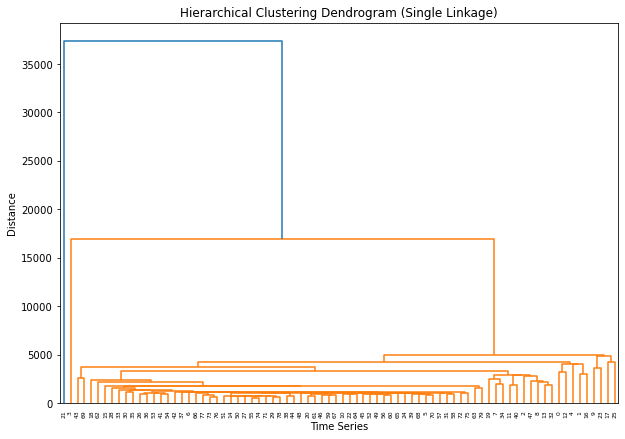

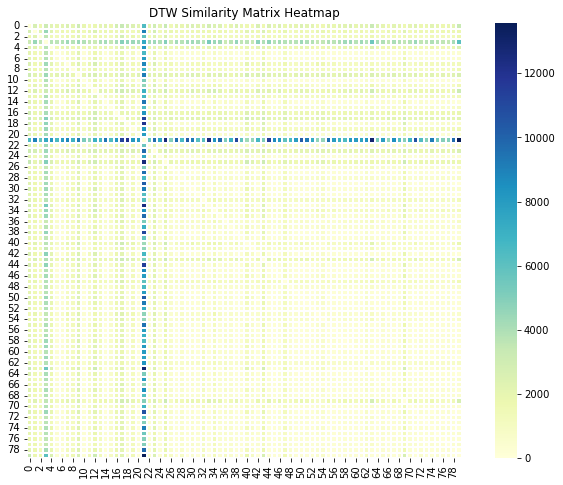

In [106]:
# Perform hierarchical clustering using the distance matrix
# Single-linkage clustering
linked = linkage(phytoplankton_similarity_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=np.arange(len(time_series_data)))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Time Series')
plt.ylabel('Distance')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(phytoplankton_similarity_matrix, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
plt.title('DTW Similarity Matrix Heatmap')
plt.show()

In [116]:
kmeans_model = KMeans(n_clusters = 3)
clusters = kmeans_model.fit_predict(phytoplankton_similarity_matrix)
print(clusters)

cluster_lists = [[] for _ in range(3)]
for i, cluster in enumerate(clusters):
 #  print(i, phytoplankton_columns[i], cluster)
    cluster_lists[cluster].append(phytoplankton_columns[i])

for i, cluster in enumerate(cluster_lists):
    print(f"Cluster {i}: {cluster}")


[2 2 2 2 2 0 0 0 0 2 0 0 2 0 0 0 2 2 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0]
Cluster 0: ['Omo', 'Orh', 'Osi', 'Ram', 'Tec', 'Tle', 'Tro', 'Dle', 'Etr', 'Nsc', 'Pbi', 'Pbr', 'Stu', 'Oro', 'Cdi', 'Cra', 'Ore', 'Ata', 'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip', 'Csu', 'Mnu', 'Pco', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi', 'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu', 'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat']
Cluster 1: ['Pha']
Cluster 2: ['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Rse', 'Tni', 'Gfl', 'Gsp', 'Kgl', 'Tor', 'Cdeb', 'Edu']


/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [117]:
sil_score = silhouette_score(phytoplankton_similarity_matrix, clusters, metric="precomputed")
db_index = davies_bouldin_score(phytoplankton_similarity_matrix, clusters)
ch_score = calinski_harabasz_score(phytoplankton_similarity_matrix, clusters)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: 0.5391066061504406
Davies-Bouldin Index: 0.5190808127474345
Calinski-Harabasz Index: 151.59948076290186
